<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/L5_3_Image_Averaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

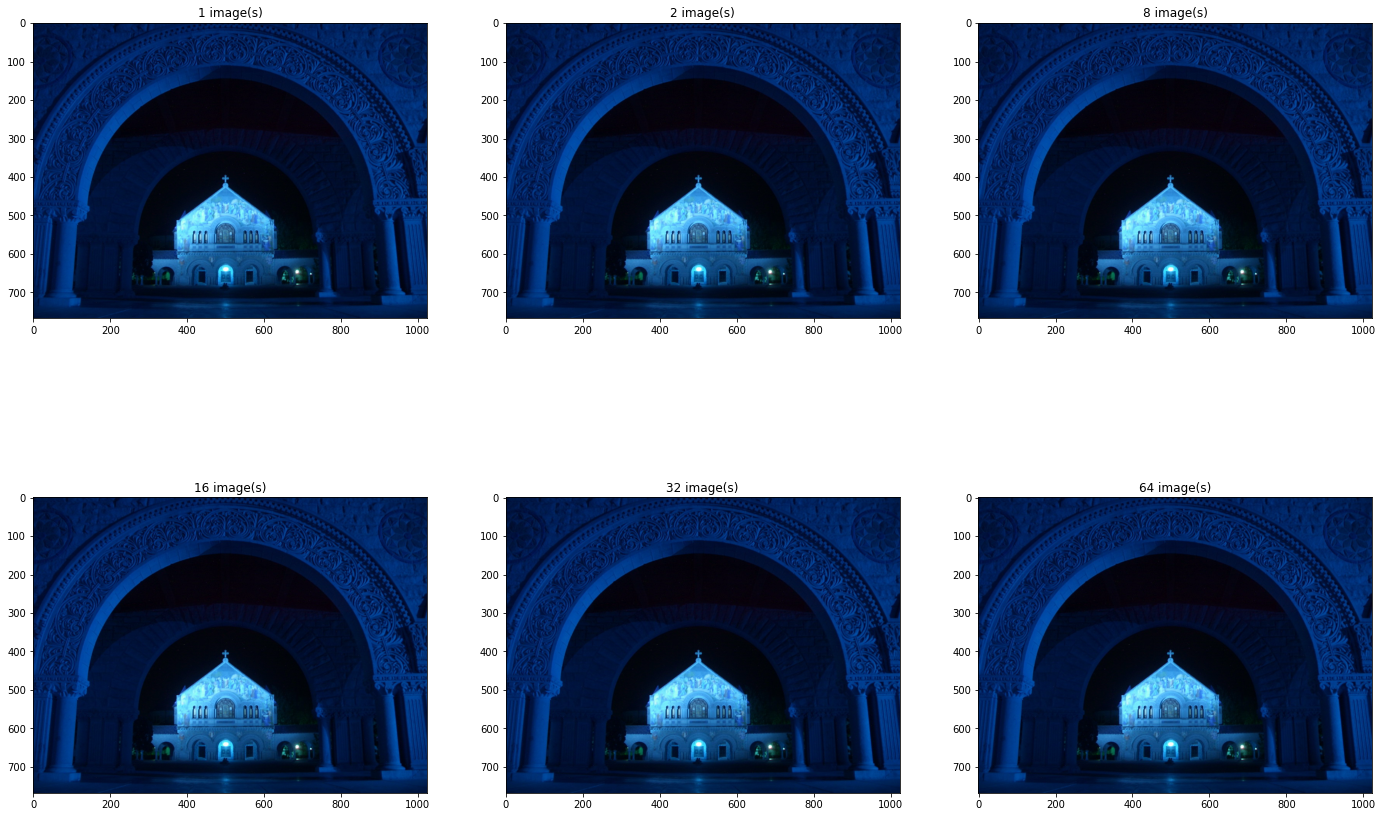

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request 

# load image
quadnight = urllib.request.urlopen('https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/quadnight.jfif')
arr = np.asarray(bytearray(quadnight.read()), dtype=np.uint8)
Img = cv2.imdecode(arr, -1)/255.0 # 'Load it as it is'

# repeat over number of sample images
nArray = [1, 2, 8, 16, 32, 64]
fig, axs = plt.subplots(2, 3, figsize=(24, 16))

for i in range(len(nArray)):
    N = nArray[i]
    avgImg = np.zeros_like(Img) #initialize an empty image
    # add Gaussian noise to each image, accumulate this image to average image
    for j in range(N):
        noisyImg = cv2.GaussianBlur(Img, (3, 3), 0.01)
        avgImg = avgImg + noisyImg
    avgImg = avgImg / N

    # show image
    row = i // 3
    col = i % 3
    axs[row, col].imshow(avgImg, cmap='gray')
    axs[row, col].set_title(str(N) + ' image(s)')
plt.show()
